# Training using the Fashion MNIST dataset
We will train and evaluate an MLP on the Fashion MNIST dataset. It consists of 70.000 grayscale images of 28x28 pixels each, and there are 10 classes.

Hyperparameters:
1. Optimizer: Momentum optimization
2. Activation function: RELU
3. Weight initialization: Default (glorot_uniform)

## Setup

In [3]:
# Common imports
import sys
import os
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Load the data

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
# Split the full training set into a validation set and a (smaller) training set.
# Normalize the data
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [7]:
X_train.shape

(55000, 28, 28)

## Create a model using the Sequential API

In [9]:
model = keras.models.Sequential()
# Input layer:
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# Hidden layers:
for layer in range(3):
    model.add(keras.layers.Dense(100, activation="relu"))
        
# Output layer.
model.add(keras.layers.Dense(10, activation="softmax"))

/Users/hk/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model
You must at least specify the loss function and the optimizer to use. You can also specify a list of additional metrics to use during training and evaluation.

In [11]:
# The optimixer is Stochastic Gradient Descent with momentum optimization. The momentum is set to 0.9.
# This value usually works well in practice. We use the default learning rate (0.01).
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

## Train the model

In [13]:
# EarlyStopping (with rollback to the best model).
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with early stopping.
history = model.fit(X_train, y_train, epochs=40,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step - accuracy: 0.7280 - loss: 0.7456 - val_accuracy: 0.8572 - val_loss: 0.3880
Epoch 2/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 626us/step - accuracy: 0.8485 - loss: 0.4088 - val_accuracy: 0.8638 - val_loss: 0.3598
Epoch 3/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.8656 - loss: 0.3642 - val_accuracy: 0.8726 - val_loss: 0.3384
Epoch 4/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.8761 - loss: 0.3380 - val_accuracy: 0.8784 - val_loss: 0.3293
Epoch 5/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 642us/step - accuracy: 0.8819 - loss: 0.3174 - val_accuracy: 0.8750 - val_loss: 0.3249
Epoch 6/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8892 - loss: 0.3004 - val_accuracy: 0.8864 - val_loss: 0.3158
Epoch 7/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.8953 - loss: 0.2850 - val_accuracy: 0.8846 - val_loss: 0.3182
Epoch 8/40
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.8980 -

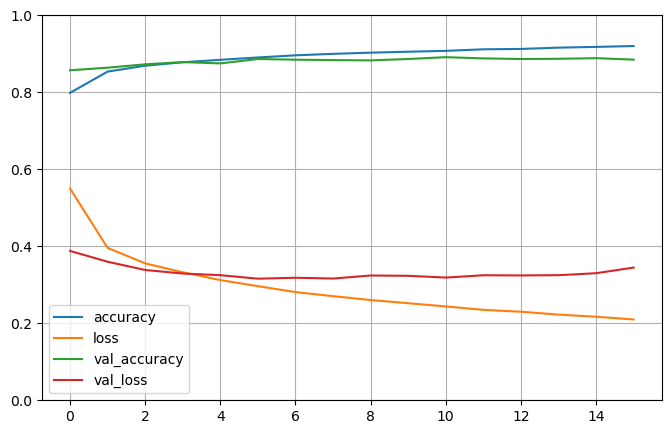

In [14]:
# Show the learning curves.
# (The training curves should be shifted half an epoch to the left to be completely comparable with
# the validation curves).

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate the model.

In [16]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - accuracy: 0.8694 - loss: 0.3667


[0.3630712926387787, 0.8711000084877014]